In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Define imports

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Set default paths

In [ ]:
main_path = "/content/gdrive/My Drive/Uni/NLP/"
data_folder = os.path.join(main_path,"data/")
train_data_name = "train.csv"
data_path = os.path.join(data_folder, train_data_name)
print(data_path)

/content/gdrive/My Drive/Uni/NLP/data/train.csv


Load and pre-process data

In [ ]:
datF = pd.read_csv(data_path)

#Take only relevant columns
datRelevant = datF[['user_review', 'user_suggestion']]
stop_words = set(stopwords.words('english'))

def clean_text(text):
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]
  tokens = [word for word in tokens if word]
  text = ' '.join(tokens)

  return text

datRelevant.loc[:, 'user_review'] = datRelevant['user_review'].apply(clean_text)
print(datRelevant.head())

                                         user_review  user_suggestion
0  m scared hearing creepy voices ll pause moment...                1
1  best game better sam pepper s youtube account ...                1
2  littly iffy controls know play easy master ve ...                1
3  great game fun colorful thata side note though...                1
4  many games cute tag right next horror tag stea...                1


In [ ]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(datRelevant['user_review'], datRelevant['user_suggestion'], test_size=0.25)

vectorizer = CountVectorizer()
train_texts_vect = vectorizer.fit_transform(train_texts)
test_texts_vect = vectorizer.transform(test_texts)

model = LogisticRegression(max_iter=1000)
model.fit(train_texts_vect, train_labels)

text_pred = model.predict(test_texts_vect)
accuracy = accuracy_score(test_labels, text_pred)
print(f"accuracy test score: {accuracy:.2f}")

accuracy test score: 0.84


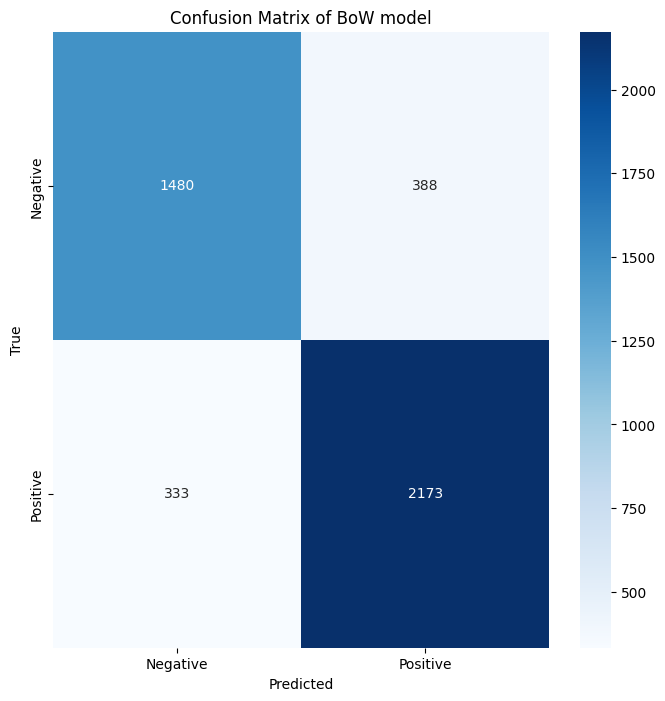

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confMtrx = confusion_matrix(test_labels,text_pred)

plt.figure(figsize=(8,8))
sns.heatmap(confMtrx, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of BoW model')
plt.show()

In [ ]:
from joblib import dump,load

model_path = os.path.join(main_path, "models/")

dump(model, os.path.join(model_path,"logistic_regression_model.joblib"))

dump(vectorizer, os.path.join(model_path,"count_vectorizer.joblib"))

['/content/gdrive/My Drive/Uni/NLP/models/count_vectorizer.joblib']